<a href="https://colab.research.google.com/github/tulasiram58827/Information-Extraction-From-Documents/blob/main/SROIE_Data_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homepage: https://rrc.cvc.uab.es/?ch=13&com=downloads. 

In [1]:
!gdown --id 10r9y17wg8Elo-3Zi61xA_8QDaKix8giN -O data.tar.xz

Downloading...
From: https://drive.google.com/uc?id=10r9y17wg8Elo-3Zi61xA_8QDaKix8giN
To: /content/data.tar.xz
247MB [00:02, 85.9MB/s]


In [2]:
!tar -xf data.tar.xz

In [3]:
import cv2
import glob
import json
import imutils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from imutils import paths
from google.colab.patches import cv2_imshow

In [4]:
images = sorted(list(paths.list_images("/content/data/img")))
len(images)

626

In [5]:
csvs = sorted(glob.glob("/content/data/box/*.csv"))
len(csvs)

626

In [6]:
jsons = sorted(glob.glob("/content/data/key/*.json"))
len(jsons)

626

In [7]:
csvs[0]

'/content/data/box/000.csv'

In [8]:
sample_csv = pd.read_csv(csvs[0], names=["x1_1", "y1_1", "x2_1", "y2_1", 
                                         "x3_1", "y3_1", "x4_1", "y4_1", "transcript"])
sample_csv.head()

,x1_1,y1_1,x2_1,y2_1,x3_1,y3_1,x4_1,y4_1,transcript
0,72,25,326,25,326,64,72,64,TAN WOON YANN
1,50,82,440,82,440,121,50,121,BOOK TA .K(TAMAN DAYA) SDN BND
2,205,121,285,121,285,139,205,139,789417-W
3,110,144,383,144,383,163,110,163,NO.53 55
4,192,169,299,169,299,187,192,187,TAMAN DAYA


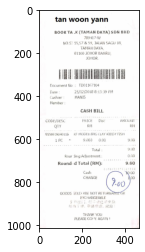

In [9]:
plt.imshow(plt.imread(images[0]))
plt.show()

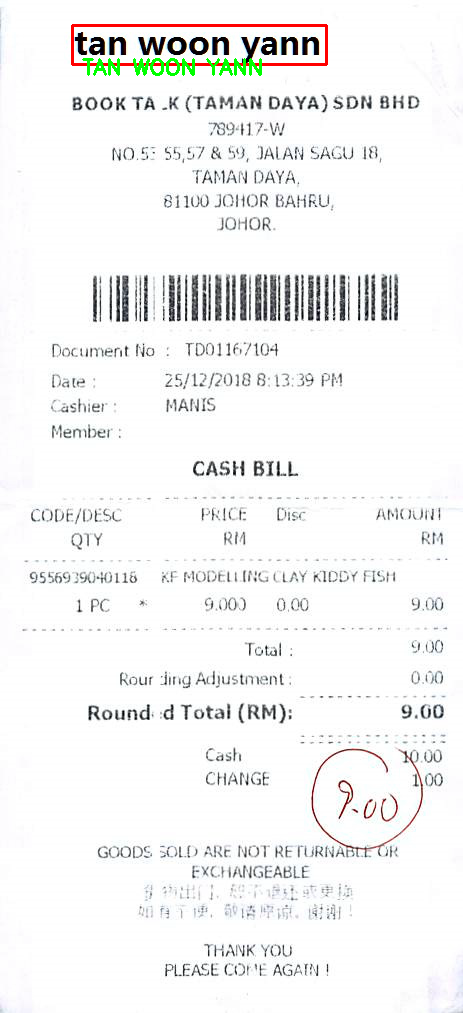

In [10]:
sample_image = plt.imread(images[0])
cv2.rectangle(sample_image, (sample_csv["x2_1"][0], sample_csv["y2_1"][0]), 
              (sample_csv["x4_1"][0], sample_csv["y4_1"][0]), 
              (0, 0, 255), 2)
cv2.putText(sample_image, sample_csv["transcript"][0], 
            (sample_csv["x4_1"][0] + 10, sample_csv["y4_1"][0] + 10), 
	        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2_imshow(sample_image)

In [11]:
!head {jsons[0]}

{
    "company": "BOOK TA .K (TAMAN DAYA) SDN BHD",
    "date": "25/12/2018",
    "address": "NO.53 55,57 & 59, JALAN SAGU 18, TAMAN DAYA, 81100 JOHOR BAHRU, JOHOR.",
    "total": "9.00"
}

In [12]:
companies = []
dates = []
addresses = []
totals = []
file_names = []

for json_file in tqdm(jsons):
    content = json.load(open(json_file, "r"))
    if len(content.keys()) == 4:
        file_names.append(json_file)
        companies.append(content["company"])
        dates.append(content["date"])
        addresses.append(content["address"])
        totals.append(content["total"])
    else:
        print("\n")
        print(json_file)

100%|██████████| 626/626 [00:00<00:00, 19964.52it/s]



/content/data/key/104.json


In [23]:
master_df = pd.DataFrame()

master_df["filename"] = file_names
master_df["company"] = companies
master_df["date"] = dates
master_df["address"] = addresses
master_df["total"] = totals

master_df.head()

,filename,company,date,address,total
0,/content/data/key/000.json,BOOK TA .K (TAMAN DAYA) SDN BHD,25/12/2018,"NO.53 55,57 & 59, JALAN SAGU 18, TAMAN DAYA, 8...",9.00
1,/content/data/key/001.json,INDAH GIFT & HOME DECO,19/10/2018,"27, JALAN DEDAP 13, TAMAN JOHOR JAYA, 81100 JO...",60.30
2,/content/data/key/002.json,MR D.I.Y. (JOHOR) SDN BHD,12-01-19,"LOT 1851-A & 1851-B, JALAN KPB 6, KAWASAN PERI...",33.90
3,/content/data/key/003.json,YONGFATT ENTERPRISE,25/12/2018,NO 122.124. JALAN DEDAP 13 81100 JOHOR BAHRU,80.90
4,/content/data/key/004.json,MR D.I.Y. (M) SDN BHD,18-11-18,"LOT 1851-A & 1851-B, JALAN KPB 6, KAWASAN PERI...",30.90


In [24]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  625 non-null    object
 1   company   625 non-null    object
 2   date      625 non-null    object
 3   address   625 non-null    object
 4   total     625 non-null    object
dtypes: object(5)
memory usage: 24.5+ KB


In [18]:
!pip install -q dateparser
import dateparser

     |████████████████████████████████| 286kB 4.3MB/s 


In [25]:
master_df["date"] = master_df["date"].apply(dateparser.parse)
master_df["total"] = pd.to_numeric(master_df["total"], errors='coerce')
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   filename  625 non-null    object        
 1   company   625 non-null    object        
 2   date      622 non-null    datetime64[ns]
 3   address   625 non-null    object        
 4   total     536 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 24.5+ KB
